# Exploratory

This notebook is an exploration of the doctor-nurse dataset. It first takes a look at the images from different categories, then computes some basic statistics about the dataset bias.

In [19]:
%matplotlib inline
import os
import random
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as figure
from IPython.display import clear_output
import time
from IPython.display import display
import ipywidgets as widgets

### Defines the location pathes of the dataset 

In [20]:
path_dr_f_d = 'dr/fem_dr_dark_56/'
path_dr_f_l = 'dr/fem_dr_light_256/'
path_dr_m_d = 'dr/mal_dr_dark_62/'
path_dr_m_l = 'dr/mal_dr_light_308/'

dr_f_d = os.listdir('dr/fem_dr_dark_56/')
dr_f_l = os.listdir('dr/fem_dr_light_256/')
dr_m_d = os.listdir('dr/mal_dr_dark_62/')
dr_m_l = os.listdir('dr/mal_dr_light_308/')

path_nur_f_d = 'nurse/fem_nurse_dark_63/'
path_nur_f_l = 'nurse/fem_nurse_light_252/'
path_nur_m_d = 'nurse/mal_nurse_dark_76/'
path_nur_m_l = 'nurse/mal_nurse_light_203/'

nur_f_d = os.listdir('nurse/fem_nurse_dark_63/')
nur_f_l = os.listdir('nurse/fem_nurse_light_252/')
nur_m_d = os.listdir('nurse/mal_nurse_dark_76/')
nur_m_l = os.listdir('nurse/mal_nurse_light_203/')

### Image display methods 

In [21]:
def show_button(i, path, imgs):
    next_button = widgets.Button(description = 'Next')   
    next_button.on_click(lambda arg: clicked(i, path, imgs))
    display(next_button)


def clicked(i, path, imgs):
    i += 1
    img_show(i, path, imgs)
    show_button(i, path, imgs)


def img_show(i, path, imgs):
    clear_output(wait=True)
    image = Image.open(path + imgs[i], "r")
    plt.imshow(np.asarray(image))
    plt.show()

# Doctor dataset 

### White Male Doctor split

In [4]:
show_button(0, path_dr_m_l, dr_m_l)

Button(description='Next', style=ButtonStyle())

### White Female Doctor split

In [5]:
show_button(0, path_dr_f_l, dr_f_l)

Button(description='Next', style=ButtonStyle())

### Dark Male Doctor split

In [6]:
show_button(0, path_dr_m_d, dr_m_d)

Button(description='Next', style=ButtonStyle())

### Dark Female Doctor split

In [7]:
show_button(0, path_dr_f_d, dr_f_d)

Button(description='Next', style=ButtonStyle())

# Nurse Dataset 

### White Male Nurse split

In [8]:
show_button(0, path_nur_m_l, nur_m_l)

Button(description='Next', style=ButtonStyle())

### Dark Male Nurse split

In [9]:
show_button(0, path_nur_m_d, nur_m_d)

Button(description='Next', style=ButtonStyle())

### White Female Nurse split

In [10]:
show_button(0, path_nur_f_l, nur_f_l)

Button(description='Next', style=ButtonStyle())

### Dark Female Nurse split

In [11]:
show_button(0, path_nur_f_d, nur_f_d)

Button(description='Next', style=ButtonStyle())

# Statistics 

###  Gender as a protected attribute

### Doctor dataset

In [23]:
nur_m

262

Proportions: 54.63% male and 45.37% female.


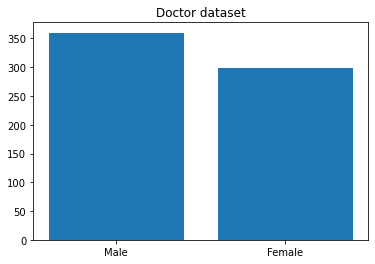

In [12]:
fig, ax = plt.subplots()
dr_m, dr_f = len(dr_m_d) + len(dr_m_l), len(dr_f_d) + len(dr_f_l)
ax.bar([0,1], [dr_m, dr_f], tick_label=["Male", "Female"])
ax.set_title("Doctor dataset")
print("Proportions: {:.2f}% male and {:.2f}% female.".format(dr_m/(dr_m + dr_f)*100, dr_f/(dr_m + dr_f)*100))

### Nurse dataset

In [18]:
nur_m

262

Proportions: 47.04% male and 52.96% female.


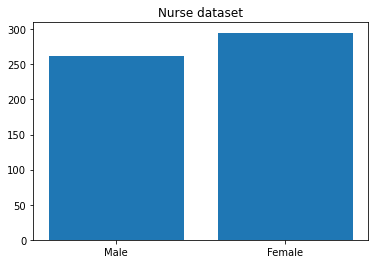

In [13]:
fig, ax = plt.subplots()
nur_m, nur_f = len(nur_m_d) + len(nur_m_l), len(nur_f_d) + len(nur_f_l)
ax.bar([0,1], [nur_m, nur_f], tick_label=["Male", "Female"])
ax.set_title("Nurse dataset")
print("Proportions: {:.2f}% male and {:.2f}% female.".format(nur_m/(nur_m + nur_f)*100, nur_f/(nur_m + nur_f)*100))

From these plots, we see that the female group is not under-represented in the dataset, but that the distribution of the protected attribute across the labels are different. This is a case of training data bias.

###  Skin color as a protected attribute

### Doctor dataset

Proportions: 81.38% light skin and 18.62% dark skin.


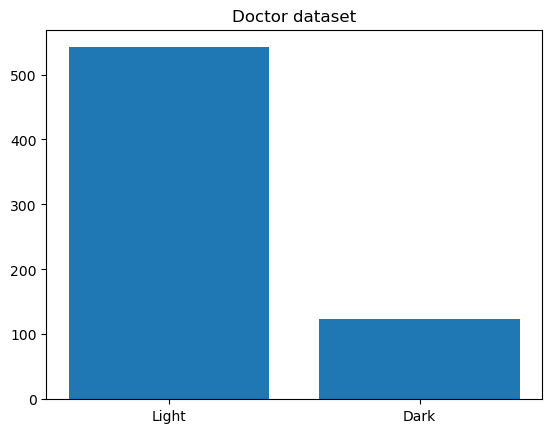

In [13]:
fig, ax = plt.subplots()
dr_l, dr_d = len(dr_m_l) + len(dr_f_l), len(dr_m_d) + len(dr_m_d)
ax.bar([0,1], [dr_l, dr_d], tick_label=["Light", "Dark"])
ax.set_title("Doctor dataset")
print("Proportions: {:.2f}% light skin and {:.2f}% dark skin.".format(dr_l/(dr_l + dr_d)*100, dr_d/(dr_l + dr_d)*100))

### Nurse dataset

Proportions: 77.56% light skin and 22.44% dark skin.


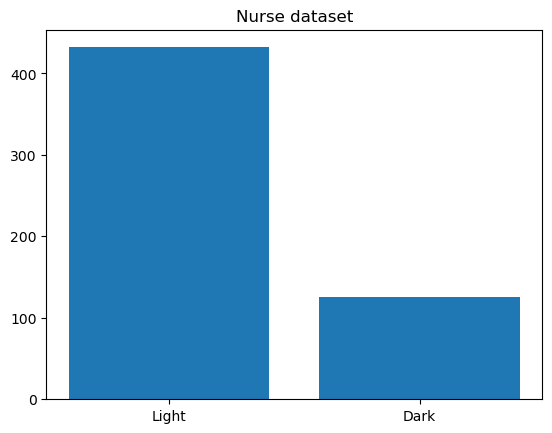

In [14]:
fig, ax = plt.subplots()
nur_l, nur_d = len(nur_m_l) + len(nur_f_l), len(nur_m_d) + len(nur_f_d)
ax.bar([0,1], [nur_l, nur_d], tick_label=["Light", "Dark"])
ax.set_title("Nurse dataset")
print("Proportions: {:.2f}% light skin and {:.2f}% dark skin.".format(nur_l/(nur_l + nur_d)*100, nur_d/(nur_l + nur_d)*100))

From these plots, we see that the dark skin group is under-represented in the dataset,whereas the distribution of the protected attribute across the labels is quite stable. This is a case of overfitting bias.